In [90]:
import numpy as np
from sklearn.datasets import load_iris

In [91]:
import sys
sys.path.append("../../../")

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

In [93]:
from SupervisedLearning.SupportVectorMachine.support_vector_machine import SupportVectorMachine

In [94]:
class DatasetConfig:
    def __init__(self, data_content, data_label, feature_name=None, label_name=None):
        self.data_content = data_content
        self.data_label = data_label
        self.feature_name = feature_name
        self.label_name = label_name
    

In [95]:
def get_non_linearly_separable_dataset():
    # 1d dataset (Obviously not linearly seperable)
    X = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]).reshape((-1, 1))
    y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0]).reshape((-1, 1))
    return DatasetConfig(X, y, np.array(["X Label", "None"]), np.array(["0", "1"]).reshape((-1, 1)))

def get_linearly_separable_dataset():
    data = load_iris()
    selected_features_idx = np.array([2, 3])
    selected_class_idx = np.array([0, 1])
    
    selected_feature_names = np.array(data.feature_names)[selected_features_idx]
    selected_target_names = data.target_names[selected_class_idx]
    
    interested_data_idx = np.isin(data.target, selected_class_idx)
    
    data_label = data.target[interested_data_idx]
    data_content = data.data[interested_data_idx][:, selected_features_idx]
    return DatasetConfig(data_content, data_label, selected_feature_names, selected_target_names)

In [96]:
def plot_feature(dataset):
    if dataset.data_content.shape[1] == 1:
        print (dataset.data_content.shape)
        plt.scatter(dataset.data_content, np.zeros_like(dataset.data_content) , c=dataset.data_label)
    elif dataset.data_content.shape[1] == 2:
        plt.scatter(dataset.data_content[:, 0], dataset.data_content[:, 1] , c=dataset.data_label)
    else:
        raise ValueError("Not supported plotting features larger than 2")

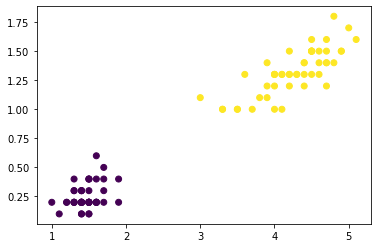

In [97]:
plot_feature(get_linearly_separable_dataset())

(9, 1)


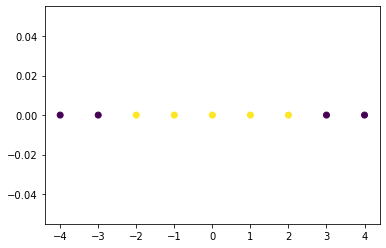

In [98]:
plot_feature(get_non_linearly_separable_dataset())